# G150 paper

##  2FHL  found unassociated 1.5 deg extended source. Jack noted that it is coincident with G150.3+4.5. Below is some work looking into the source

In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import sys
import os
import yaml
import aplpy
import numpy as np
import pyJam.fermi.SNR_MC.coCube as cocube
from pyJam.fermi.SNR_MC.distNsep import *
from lande.utilities.tools import tolist #for saving yaml
import pyJam.kdistMaster as kd
from IPython.core.display import Image 
import astropy.io.fits as pf
import pandas as pd

%load_ext autoreload
%autoreload 2

home = os.environ['HOME']
os.chdir(os.path.join(home,'Dropbox/CurrentWork/G150/'))

### 2FHL values (double check if these are the values in 2FHL or an early iteration of my analysis pipeline)

In [10]:

#use Dame et al. CO cube to make 
#add 3FGL source and circle for fit SNR at > 50 geV
b = 5.221292 #150.57 where did I get these from?
l = 150.3818
snrRad = 1.27
s = 10
#this is just the entire velocity range, I should add different vals for the different HI vels
coVmin = -319
coVmax = 319

# fitsMap    = 
#contsz     = 5,
# regFile    = None,
# contFits   = None,
# coords     = 'gal',
# fTitle     = '',
# contLevels = 9,
# smooth     = 1,

In [ ]:
#can I use aplpy for anything
#I know I can make slices at single vel, what else?
f = aplpy.FITSFigure(fitsFile) #f = aplpy.FITSFigure(fitsFile, figure = plt.figure(1),**kwargs)

In [12]:
### Modify this
lmin, lmax, bmin, bmax = cocube.getMapSize(l,b,s)
co = cocube.COline(COfile = '/Users/jmcohen/Desktop/cur/fitsFiles/COGAL_deep_mom_vlsr.fits') #change this to use different CO file
co.lvbSum(axis = 'all', pmin = [lmax,bmin,coVmin], pmax = [lmin,bmax,coVmax]) #I think this will just make the sliced cubes right?
# mapType = {'tsmap':'TS', 'cmap':'Counts: Data - Model','signifFT': '(Data - Model)/sqrt(Model)'}

# maps = ['',''] #add path to initial residual tsmap and cmap
# for m in mapType:
#             mName  = [self.snrName + '_nby_%s_zero.fits' %(m), self.snrName + '_nby_%s_zeroSNR.fits' %(m)]
#             for n in mName:
#     plotSlice(fitsFile = m, figTitle = fTitle, cbarTitle = mapType[m], cont = contFits, reg = regFile[0::2],  zoom = zoom , circ = circ, levels= contLevels, smooth = smooth, colors = ['k'], outText = '_vel' + self.vel) #one with labled in 50pc

0 (155.3818, 145.3818) 155.3818 145.3818 d (493, 81, 2881)
nmin/ nmax: 197.0 277.0
1 (0.22129200000000004, 10.221292) 0.221292 10.221292 d (493, 81, 2881)
nmin/ nmax: 42.0 81
2 (-319, 319) -319 319 d (493, 81, 2881)
nmin/ nmax: 1.0 492.0
nmin: {1: 197.0, 2: 42.0, 3: 1.0} nmax: {1: 277.0, 2: 81, 3: 492.0}
indiv 1.0 492.0 42.0 81 197.0 277.0
G150_COGAL_deep_mom_vlsr_sliced.fits already exists, delete and create it anew 
Save 3-D sliced Cube
G150_COGAL_deep_mom_vlsr_vb.fits already exists, delete and create it anew 
G150_COGAL_deep_mom_vlsr_lv.fits already exists, delete and create it anew 
G150_COGAL_deep_mom_vlsr_lb.fits already exists, delete and create it anew 


## Right now all values below are From fermiSymp15 poster. Are they all pointlike and not gtlike results? Poster says E > 5 GeV.

## Radio, CO, HI, and other propteries

In [179]:
#For Galactic rotation curve, only negative velocities are allowed (why?), so left out 2.9 km/s
HIvels = [-44.7, -35.9, -6.9]# left out 2.9] #Vlsr HI velocties[km/s], all with widths 5 km/s or less, so there is no evidence of line broadening from the SNR shock
lrad = 150.3
brad = 4.5
R0 = 8.3  # [kpc] distance to center of Galaxy
V0 = 239 # [km/s] LSR velocity 

## Remake the CO map from above since I fixed somethings in coCube
## HAVEN'T DONE THIS YET

In [ ]:
lmin, lmax, bmin, bmax = cocube.getMapSize(l,b,s)
co = cocube.COline(COfile = '/Users/jmcohen/Desktop/cur/fitsFiles/COGAL_deep_mom_vlsr.fits') #change this to use different CO file
co.lvbSum(axis = 'all', pmin = [lmax,bmin,coVmin], pmax = [lmin,bmax,coVmax]) #I think this will just make the sliced cubes right?

# GeV extended source properties

### From fermiSymp15 poster. All pointlike and not gtlike results?
### Poster says E > 5 GeV

In [55]:
R_gev = 1.46 #pointlike uniform disk fit radius [deg], +/- 0.03
index_gev = -1.88 # Power law index +/- 0.06
alpha_rad = -0.6  #Gao & Han 2014
jacksDists= [5.5,4,0.6]

# Estimate Distance from Galactic Rotation curve
## Looks like the two far distance are the same as Jack's, but not the one that corresponds to -6.9 km/s, not sure why

In [205]:
dist = np.vectorize(kd.kdist)
dnear = dist(l = lrad, b = brad, vin = HIvels, near = True,r0 = R0,v0=V0)
dfar = dnear = dist(l = lrad, b = brad, vin = HIvels, near = False,r0 = R0,v0=V0)
print 'HI velocites are %s' %HIvels
print 'Near distances %s' %dnear
print 'Far distances %s' %dfar

HI velocites are [-44.7, -35.9, -6.9]
Near distances [ 5.55560684  3.93866347  0.38365575]
Far distances [ 5.55560684  3.93866347  0.38365575]


## Physical size 
### My numbers are a little different than Jack's, I think mine are right, if I do it in astropy I get my results

In [197]:
size = np.vectorize(physSep)
sizes = size(t=R_gev*2, d=dnear) #t is for theta = angular radius, 2* for diameter/size
rads = sizes/2.
jsizes = size(t=R_gev*2, d=jacksDists) #t is for theta = angular radius, 2* for diameter/size
jrads = jsizes/2
print 'Physical radius of sources in pc: %s' %sizes
print "Physical radius of sources (using Jack's dists) in pc : %s" %jsizes

Physical radius of sources in pc: [ 283.13380341  200.72852533   19.55248362]
Physical radius of sources (using Jack's dists) in pc : [ 280.29987787  203.85445663   30.57816849]


# Sedov-Taylor phase stuff (see section 6 Truelove & McKee 1999)
Radius of the expanding shell (I think these 2 versions are equal?)
\begin{equation} R_{ST} = 0.26 (n_H/cm^{-3})^{-1/5}(t_{ST}/yr)^{2/5} (E_{ST}/4\times 10^{50} erg)^{1/5} pc = 0.31(E_{51}/n_0)^{1/5}t_{y}^{2/5} pc\end{equation}
In terms of t (this is missing a factor in front
\begin{equation}t_y = (n_0/E_{51})^{1/2}(R_{ST}/0.31)^{5/2}\end{equation} 
Velocity of expanding shell
\begin{equation}v_s = 1.23\times 10^5(E_{51}/n_0)^{1/5}t_{y}^{2/5} km s^{-1}\end{equation}
Temperature of expanding shell
\begin{equation}T_s = 2.09\times 10^{11} = (E^{51}/n_0)^{2/5}t^{-6/5} K\end{equation}

In [198]:
#make this allwork with astropy units?
def Rst(t,n0=1,E=1e51):
    """Sedov-Taylor phase SNR radius as 
       function of time. Is this Chevalier 1982 or Truelove & McKee 1999? I think the former? See Reynolds 2008
       
       n0 = ambient density [ cm^-3]
       t = SNR age [yr]
       E = SN explosion energy erg
       """
    return 0.314*t**(2/5.)*((E/1.e51)/n0)**(1/5.)

def Tst(R,n0=1, E=1e51):
    """Sedov-Taylor phase SNR age as
       function of
       
       n0 = ambient density [ cm^-3]
       R = Sedov-Taylor phase SNR radius [pc]. 
       E = SN explosion energy erg
    """
    return (n0/(E/1e51))**(1/2)*(R/(0.314))**(5/2.)


## Test Rst and Tst on data for W44

In [201]:
#This matches Uchiyama 2012 so long as the prefactor is 0.314, bit off if it's just 0.31
# r_w44 = Rst(t = 1e4, n0 = 2, E = 2e51)
# t_w44 = Tst(R = 12.5,n0 = 2, E=2e51)
# print 'Test W44: R = %s, T = %s' %(r_w44,t_w44)


Test W44: R = 12.5005651554, T = 9998.86977867


# Using physical sizes calucalted above, estimate age if in ST phase

In [203]:
T = np.vectorize(Tst)
R = np.vectorize(Rst)
T_g150 = T(R = rads,n0 = 1, E=1e51) #what should E and n0 be? 
jT_g150 = T(R = jrads,n0 = 1, E=1e51) #what should E and n0 be? 
print 'For n0 = 1 cm^-3, E_51 = 1\nWith physical radii %s\nAges in kyr:%s\n' %(rads,T_g150/1.e3)
print "Same but with Jack's distances, and physical radii %s\nAges in kyr: %s\n" %(jrads,jT_g150/1.e3)

For n0 = 1 cm^-3, E_51 = 1
With physical radii [ 141.5669017   100.36426267    9.77624181]
Ages in kyr:[ 4315.98769774  1826.51660903     5.40885972]

Same but with Jack's distances, and physical radii [ 140.14993894  101.92722832   15.28908425]
Ages in kyr: [ 4208.79877118  1898.45984902    16.5435826 ]



# Can I make assumptions about PWN/PSR asusming the GeV extended source is the PWN?

## Are the main arguments for it being an **old** PWN that it's large and the spectrum looks PWN-like? 

## Rpwn depends on Edot and M_ejecta. If I know typical M_ejecta I can estimae Edot. Eq'n 9 in Gaensler & Slane 2006 gives ... After estimating (guessing) Edot, how does Lgam / Edot compare to other

## Slane et al 2010, HESS J1640, Chevalier 1977, Gelfand et al 2009 (eqn B7). If t << tau then E ~ Edot
### Maybe this isn't so useful?

$\mathrm{R_{PWN} \sim 1.1 \dot{E}^{1/5}_{E_{0,38}} E^{3/10}_{51} M^{-1/2}_{10} t^{6/5}_3 pc}$ 

$\dot{E}_{E_{0,38}}$ is the initial spin down power, 

$M_{10}$ is the ejecta mass in units of 10 Msol

## also from this Slane paper, they estimate the current spin down power of the pulsar with the emprical relationship for Edot/Lx in Possenti 2002. Can we use the fact that we see no significant x-ray emission to put an uppper limit on x-ray flux --> xray lum (assuming distance) and an upper limit on Edot?

In [ ]:

#Evolution of PWN radius through SNR ejecta
#I think this is neglecting encounter with reverse shock of the SNR though?

Rpwn =  1.1 

## Assuming typical PSR velocity, about how far offset would it be given estimated age from above?
### Gaensler & Slane  2006: v_psr ~400-500 km/s, but I think some have extreme at 1000 km/s. Travels ballistically. was it this paper that they also give the time for the PSr to reach the forward shock of the SNR

## For 400 km/s and nearest dist:   sep = 2.2 pc , 0.3 deg
## For 1000 km/s and nearest dist: sep = 5.5 pc, 0.8 deg
## Where are the 3 3FGL sources wrt to this? I can also go the other way around and estimate the PSR velocity given it's offset from the center and assumed distance

In [218]:
#lets just look at the far distance
#psrVs = np.array([400.,500.,1000.])*u.km/u.s
psrVs = np.array([1.e3])*u.km/u.s
psrDs = psrVs*(T_g150*u.yr)
psrDs = psrDs.to(u.pc)
angD = np.vectorize(angSize)
print "Projected pulsar distances: %s" %psrDs.to(u.pc)
print "For ages %s kyr" %(T_g150/1e3)




Projected pulsar distances: [ 4414.0131227   1868.00075573     5.53170663] pc
For ages [ 4315.98769774  1826.51660903     5.40885972] kyr


In [220]:
psrSep_Dist = zip(psrDs.value,dnear)
for i in psrSep_Dist:
    print "PSR angular offset = %s deg for %s pc sep, dist = %s kpc" %(angSize(i[0],i[1]),i[0],i[1])
#d_ang = angD(psrDs,dnear)

PSR angular offset = 45.5223578501 deg for 4414.0131227 pc sep, dist = 5.55560684002 kpc
PSR angular offset = 27.1738269275 deg for 1868.00075573 pc sep, dist = 3.93866346894 kpc
PSR angular offset = 0.826114148527 deg for 5.53170663045 pc sep, dist = 0.38365575023 kpc


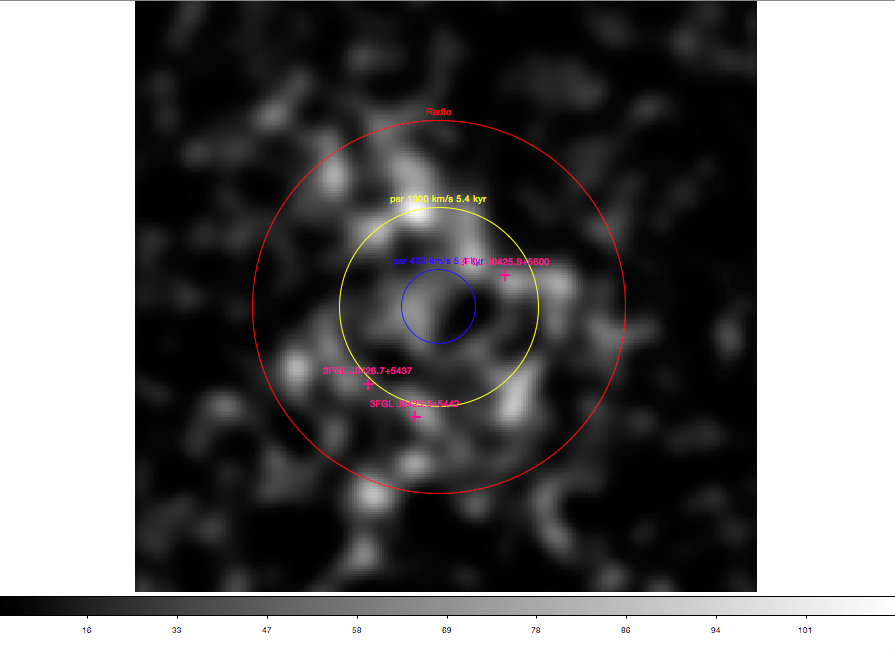

In [6]:
Image(filename= os.path.join(home,'Dropbox/CurrentWork/G150/G150_smoothResidCmap_PSRdists.png'), height = 800, width = 800)

# Anything to do with  van der swallow 2001 (see also HESS kookaburra paper, and some dejeager 2008 paper?) that says Rpwn/Rsnr ~0.25 (after reverse shock interaction?). If it is the PWN we're seeing then my age estimates are wrong, but I can estimate Rsnr and get age from that?

## Edot from LAT TeV PWN (idk if I need these)

In [10]:
tevPSR_Edot = np.asarray([4.5e+35, 4.6e+38, 1.7e+35, 3.2e+34, 6.9e+36, 2.6e+36, 1.1e+37, 8.4e+35, 2.3e+36, 1.7e+36, 3.1e+36, 4.9e+36, 1.0e+37, 9.1e+35, 1.7e+37, 1.6e+37, 3.0e+36, 4.0e+36, 2.1e+35, 3.4e+35, 3.4e+36, 1.3e+36, 2.2e+36, 1.8e+36, 6.8e+37, 2.3e+33, 2.8e+36, 1.1e+36, 3.4e+37, 5.5e+36, 5.9e+36, 8.1e+36, 9.8e+36, 4.6e+36, 2.8e+36, 2.9e+36, 1.2e+37, 3.4e+35, 1.6e+35, 3.4e+36, 2.2e+37])
tevPSRdist =  np.asarray([1.4, 2.0, 1.0, 0.2, 0.29, 2.9, 2.8, 2.3, 8.4, 6.7, 2.5, 1.6, 5.6, 4, 4.2, 7.8, 6.8, 3.0, 5.0, 4.8, 2.3, 3.6, 3.8, 3.5, 4.7, 7.8, 3.9, 4.0, 4.7, 6.6, 1.3, 5.1, 6, 7, 9.0, 3.2, 4.8, 9, 2.5, 10, 0.8])
tevPWNSigmaGauss = np.asarray([1.30, 0.18, 0.14, 0.05, 0.16, 0.20, 0.08, 0.06, 0.04, 0.17, 0.26, 0.15, 0.11, 0.23, 0.14, 0.07, 0.21, 0.11, 0.04, 0.35, 0.25, 0.30, 0.29, 0.15, 0.14, 0.16, 0.53, 0.04, 0.14, 0.13, 0.15, 0.09, 0.12, 0.41, 0.32, 0.11, 0.08, 0.34, 0.26, 0.55, 1.50, 0.10])

In [16]:
print 'Edot:: Mean: ', tevPSR_Edot.mean(), 'Max:',tevPSR_Edot.max(), 'Min: ',tevPSR_Edot.min()
print 'PSR dist:: Mean: ', tevPSRdist.mean(), 'Max: ',tevPSRdist.max(), 'Min :', tevPSRdist.min()
print 'PWN Sigma Gauss:: Mean: ', tevPWNSigmaGauss.mean(), 'Max: ',tevPWNSigmaGauss.max(), 'Min: ',tevPWNSigmaGauss.min()

Edot:: Mean:  1.79891292683e+37 Max: 4.6e+38 Min:  2.3e+33
PSR dist:: Mean:  4.3143902439 Max:  10.0 Min : 0.2
PWN Sigma Gauss:: Mean:  0.243095238095 Max:  1.5 Min:  0.04


# Yes SNR args:
* Spectrally, spatially similar to PKS 1209-51/52
    * Large diameter SNR towards outer Galaxy (can’t be too far away)
		* Low GeV/Radio surface brightness
		* Hard GeV spectral index (1.6? 1.8?)
* BIG DIFFERENCE: No prominent X-ray emission
* If Γ~1.6, then fits well with IC scenario (radio α = -0.6)
* If Γ~2, better fits with Brems, Pizero, or IC cutoff
    * => Need better GeV spectrum (>1 GeV)
* Good agreement between > 5gev disk fit and radio shell

# Info on the 3 3FGL sources

In [3]:
fglSources = ["3FGL J0425.8+5600","3FGL J0426.7+5437","3FGL J0423.5+5442"]
fglPath = os.path.join(home,"Dropbox/Catalogs/3FGL/gll_psc_v16.fit")
fgl3d = pf.getdata(fglPath)
poplist = []
fgl3dict = {x:fgl3d.field(x) for x in fgl3d.names}
for i in fgl3dict:
    fgl3dict[i] = list(fgl3dict.get(i))
#     if fgl3dict.get(i).ndim > 1:
#         poplist.append(i)

# for i in poplist:
#     fgl3dict.pop(i)
fgl3DF = pd.DataFrame(fgl3dict)
fgl3DF.set_index('Source_Name',inplace = True)
maxl = len(fgl3DF)
pd.set_option('display.max_columns', maxl)
pd.set_option('display.max_rows', maxl) #I will transpose the frame later


In [40]:
just3.PowerLaw_Index

Source_Name
3FGL J0425.8+5600    2.347609
3FGL J0426.7+5437    2.478879
3FGL J0423.5+5442    2.625293
Name: PowerLaw_Index, dtype: float64

In [4]:
just3 = fgl3DF.loc[fglSources]
just3_TS1_300 = just3.Sqrt_TS1000_3000**2 + just3.Sqrt_TS3000_10000**2 + just3.Sqrt_TS10000_100000**2 
print "TS summed over 1-100GeV bands %s\nAvg TS over all bands %s" %(just3_TS1_300,just3.Signif_Avg**2)

TS summed over 1-100GeV bands Source_Name
3FGL J0425.8+5600     25.542609
3FGL J0426.7+5437    137.203870
3FGL J0423.5+5442     14.265376
dtype: float64
Avg TS over all bands Source_Name
3FGL J0425.8+5600     40.145917
3FGL J0426.7+5437    201.473487
3FGL J0423.5+5442     19.748591
Name: Signif_Avg, dtype: float64


In [6]:
just3

,0FGL_Name,1FGL_Name,1FHL_Name,2FGL_Name,ASSOC1,ASSOC2,ASSOC_GAM1,ASSOC_GAM2,ASSOC_GAM3,ASSOC_TEV,CLASS1,Conf_68_PosAng,Conf_68_SemiMajor,Conf_68_SemiMinor,Conf_95_PosAng,Conf_95_SemiMajor,Conf_95_SemiMinor,Cutoff,DEJ2000,Energy_Flux100,Exp_Index,Extended_Source_Name,Flags,Flux1000,Flux10000_100000,Flux1000_3000,Flux100_300,Flux3000_10000,Flux300_1000,Flux30_100,Flux_Density,Flux_History,Flux_Peak,GLAT,GLON,Peak_Interval,Pivot_Energy,PowerLaw_Index,RAJ2000,ROI_num,Signif_Avg,Signif_Curve,Signif_Peak,Spectral_Index,SpectrumType,Sqrt_TS10000_100000,Sqrt_TS1000_3000,Sqrt_TS100_300,Sqrt_TS3000_10000,Sqrt_TS300_1000,Sqrt_TS30_100,TEVCAT_FLAG,Time_Peak,Unc_Cutoff,Unc_Energy_Flux100,Unc_Exp_Index,Unc_Flux1000,Unc_Flux10000_100000,Unc_Flux1000_3000,Unc_Flux100_300,Unc_Flux3000_10000,Unc_Flux300_1000,Unc_Flux30_100,Unc_Flux_Density,Unc_Flux_History,Unc_Flux_Peak,Unc_Spectral_Index,Unc_beta,Variability_Index,beta,nuFnu10000_100000,nuFnu1000_3000,nuFnu100_300,nuFnu3000_10000,nuFnu300_1000,nuFnu30_100
Source_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3FGL J0425.8+5600,,,1FHL J0425.4+5601,,,,,,,,,-60.130001,0.038607,0.031946,-60.130001,0.0626,0.0518,-inf,56.014000,8.321129e-12,-inf,,4,6.605890e-10,4.340072e-11,3.138084e-10,2.078169e-08,6.243402e-11,2.975179e-09,NaN,1.985992e-13,"[2.10069e-08, 0.0, 4.20274e-09, 0.0, 1.62416e-...",-inf,4.750383,149.768005,-inf,1895.994263,2.347609,66.451599,121,6.336081,0.105451,-inf,2.347609,PowerLaw,4.136577,2.136711,3.544490,1.966166,3.415236,NaN,N,-inf,-inf,1.803004e-12,-inf,1.173928e-10,"[-1.7196e-11, 2.21295e-11]","[-1.52066e-10, 1.61211e-10]","[-5.90011e-09, 5.94908e-09]","[-3.55209e-11, 4.23566e-11]","[-8.91388e-10, 9.04291e-10]",NaN,3.517155e-14,"[[-1.38949e-08, 1.88575e-08], [nan, 1.64684e-0...",-inf,0.165640,-inf,51.673359,-inf,6.751109e-13,7.289679e-13,4.827527e-12,4.116718e-13,1.961747e-12,NaN
3FGL J0426.7+5437,,1FGL J0426.5+5437,,2FGL J0426.7+5434,,,,,,,,35.450001,0.043788,0.041691,35.450001,0.0710,0.0676,-inf,54.616798,2.128958e-11,-inf,,0,2.295638e-09,3.259613e-15,2.690153e-09,1.657099e-08,1.384689e-10,1.061097e-08,NaN,7.263759e-12,"[5.48841e-08, 1.87712e-08, 2.98574e-08, 3.1262...",-inf,3.873888,150.867020,-inf,852.094971,2.478879,66.681297,121,14.194136,7.685437,-inf,2.467036,LogParabola,0.000000,11.326524,3.159402,2.985587,7.313225,NaN,N,-inf,-inf,2.688777e-12,-inf,2.180972e-10,"[nan, 1.59648e-11]","[-2.7555e-10, 2.85162e-10]","[-5.1779e-09, 5.39212e-09]","[-5.28429e-11, 5.96814e-11]","[-1.53674e-09, 1.53674e-09]",NaN,5.895361e-13,"[[-1.5109e-08, 1.62485e-08], [-1.31111e-08, 1....",-inf,0.119907,0.126830,51.832188,0.561026,3.020115e-17,5.752318e-12,4.538752e-12,7.438427e-13,7.309950e-12,NaN
3FGL J0423.5+5442,,,,,,,,,,,,80.150002,0.092447,0.068888,80.150002,0.1499,0.1117,-inf,54.705799,1.293986e-11,-inf,,0,7.461712e-10,1.527913e-11,2.587464e-10,2.164329e-08,1.490207e-10,5.135374e-09,NaN,1.069312e-12,"[0.0, 3.08672e-08, 0.0, 0.0, 5.42339e-08, 2.62...",-inf,3.612116,150.486969,-inf,1049.148315,2.625293,65.899597,121,4.443939,0.935096,-inf,2.625293,PowerLaw,1.152993,1.197572,2.345848,3.391431,3.097338,NaN,N,-inf,-inf,3.064332e-12,-inf,1.617157e-10,"[-1.36454e-11, 1.87304e-11]","[-2.17509e-10, 2.26957e-10]","[-9.24804e-09, 9.27347e-09]","[-5.14642e-11, 5.78599e-11]","[-1.65906e-09, 1.70818e-09]",NaN,2.129744e-13,"[[nan, 3.62721e-08], [nan, 3.00776e-08], [nan,...",-inf,0.151782,-inf,61.846989,-inf,2.159248e-13,5.854846e-13,4.897386e-12,9.524551e-13,3.282238e-12,NaN


# J0426 is the pulsar-like source